In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# carrega os dados
df = pd.read_csv("salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.dtypes

In [ ]:
# removendo caracter special e transformando salario em float
df["Salary"] = df["Salary"].str.replace(r"\$", "").astype(float)

In [5]:
# eda - automatico
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html(
    filepath="Análise Exploratória.html",
    open_browser=True,
    layout="widescreen",
    scale=None,
)

                                             |          | [  0%]   00:00 -> (? left)

Report Análise Exploratória.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



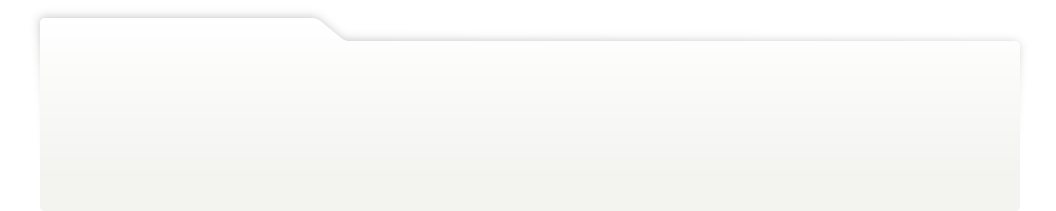
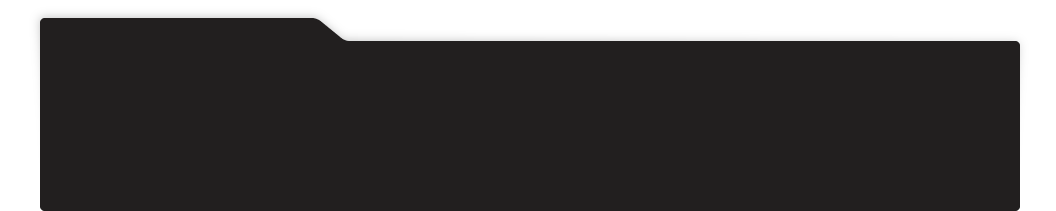
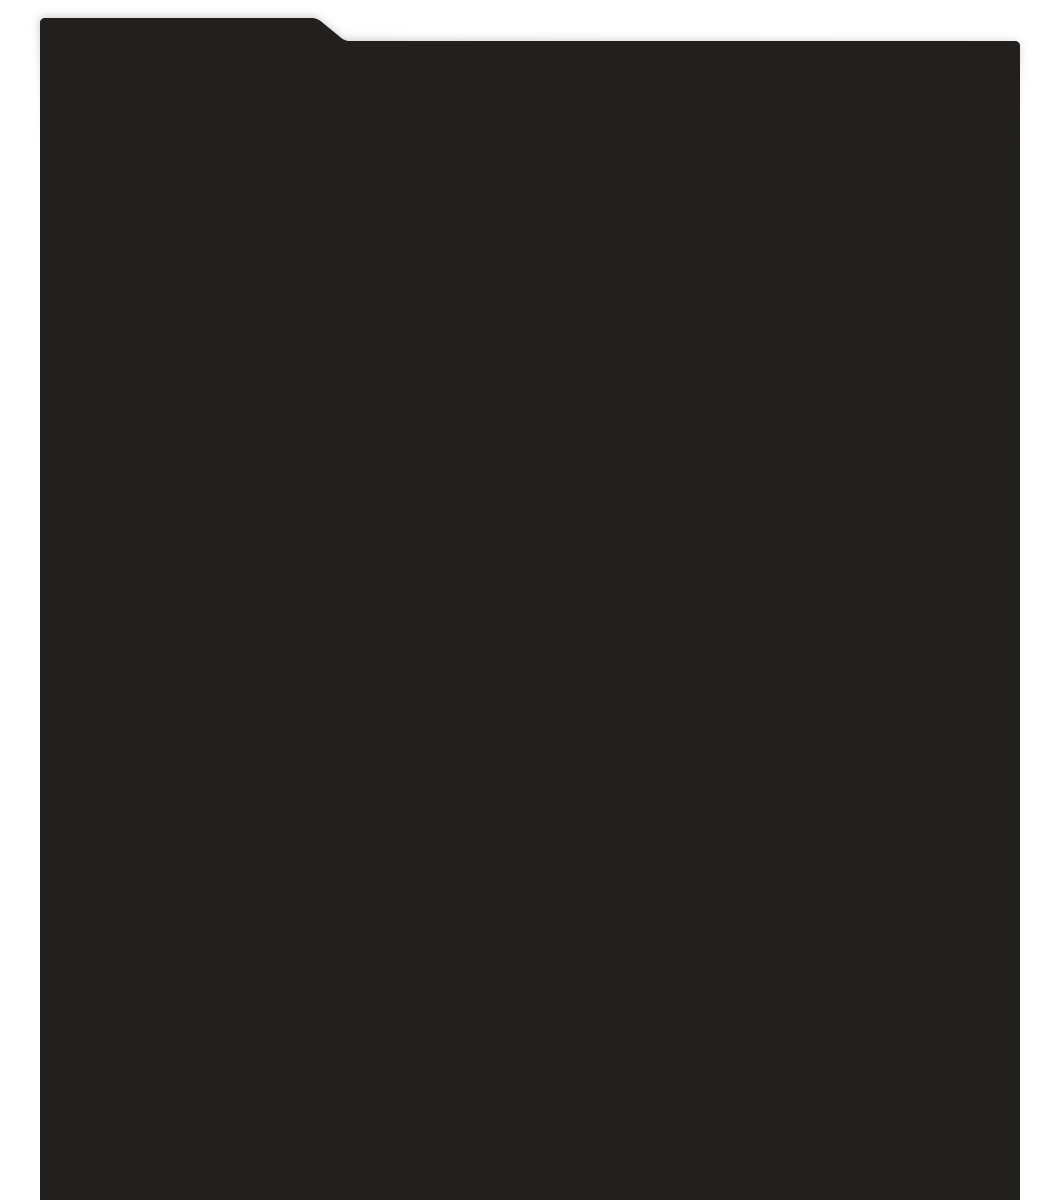
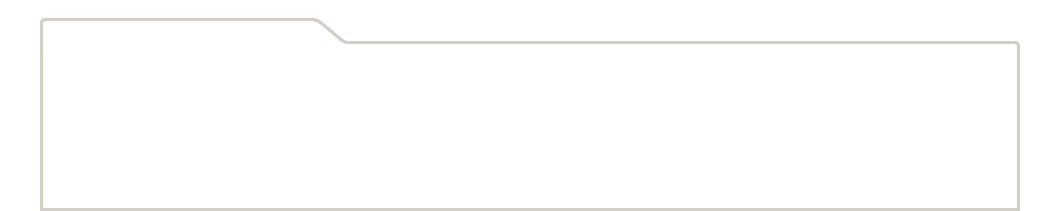
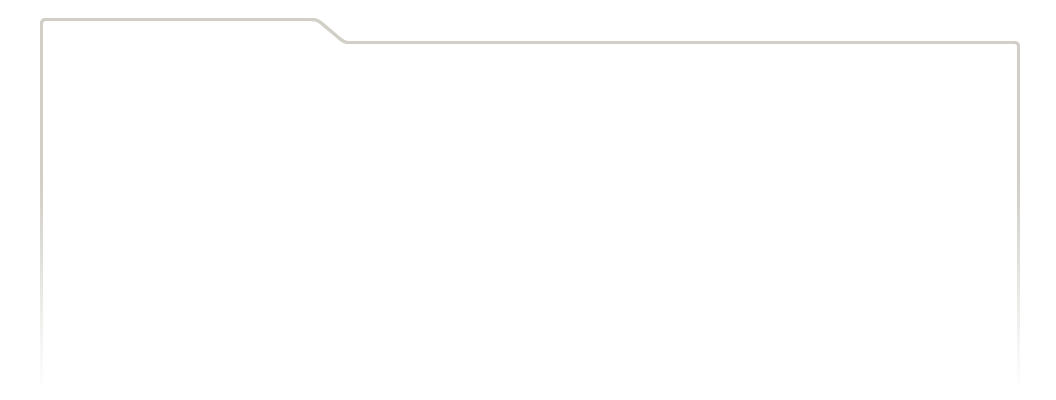
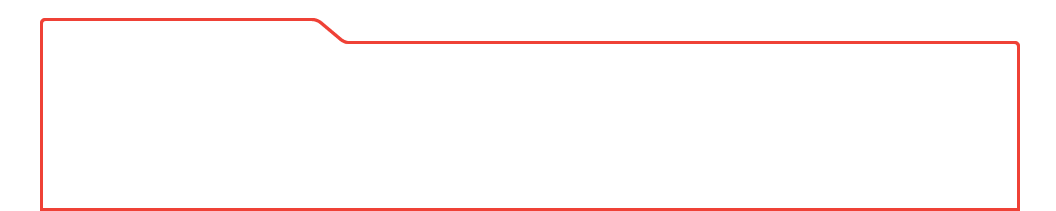
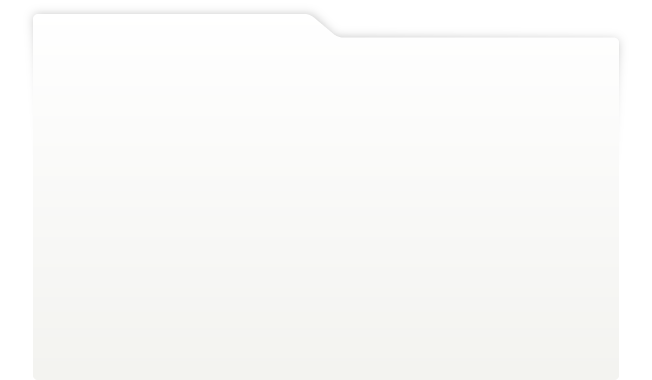
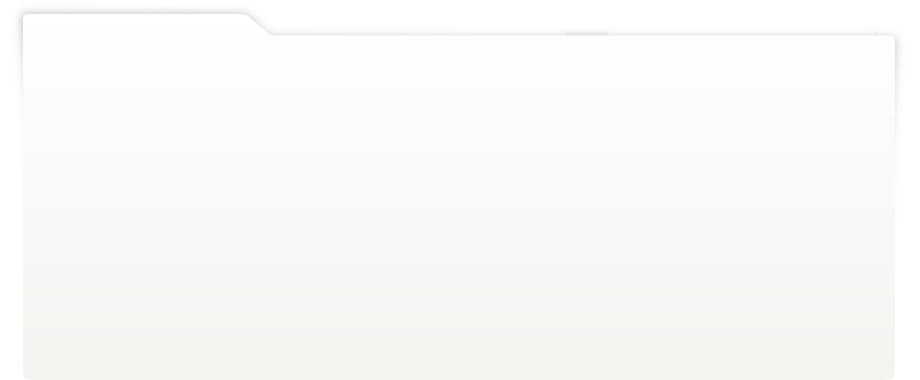
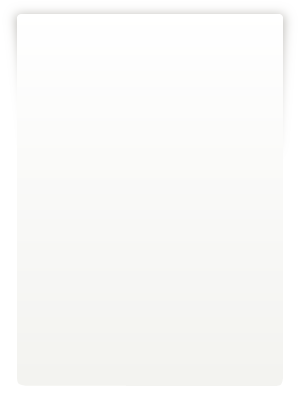
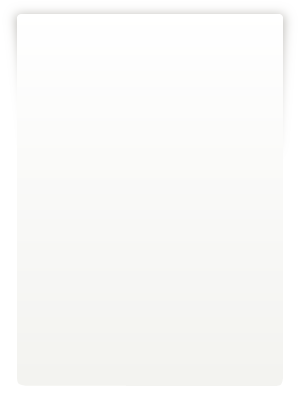
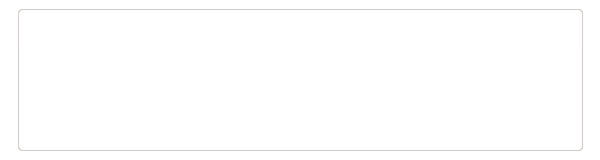
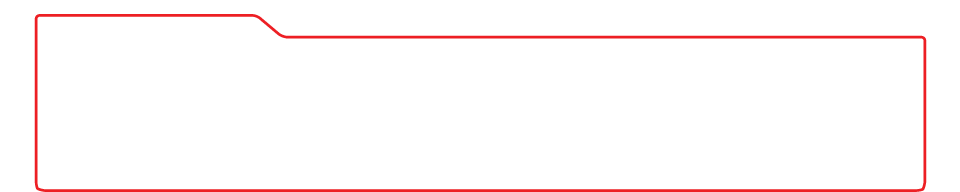
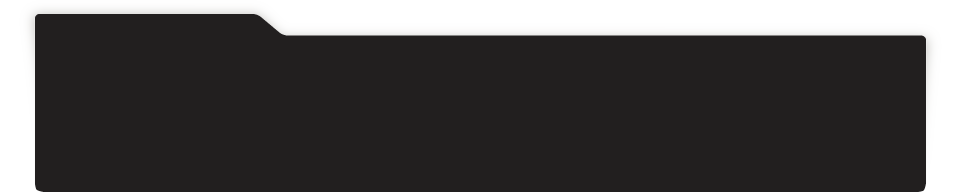
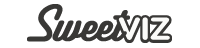
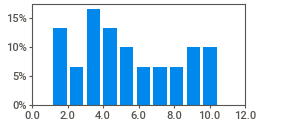
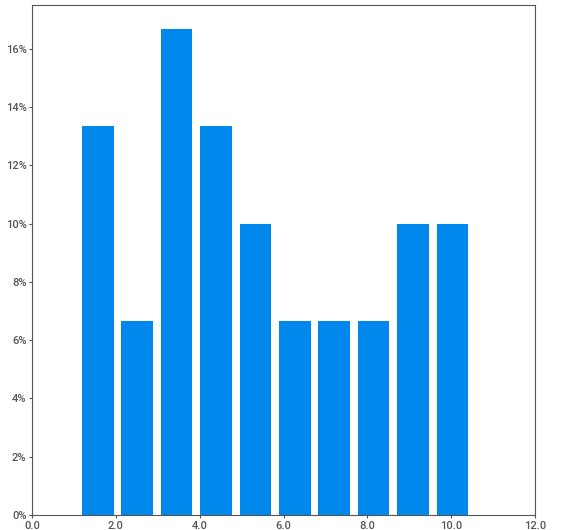
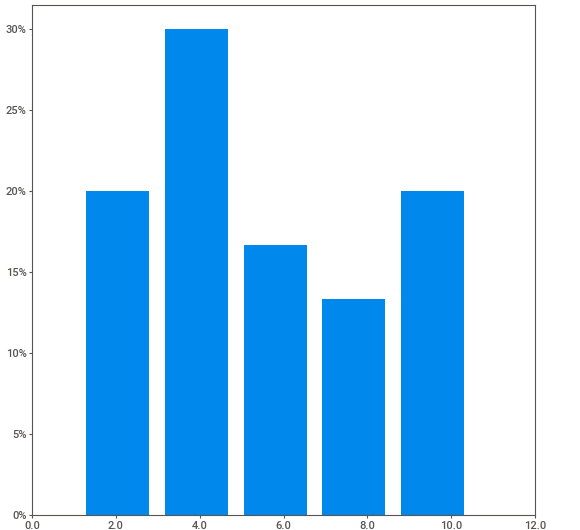
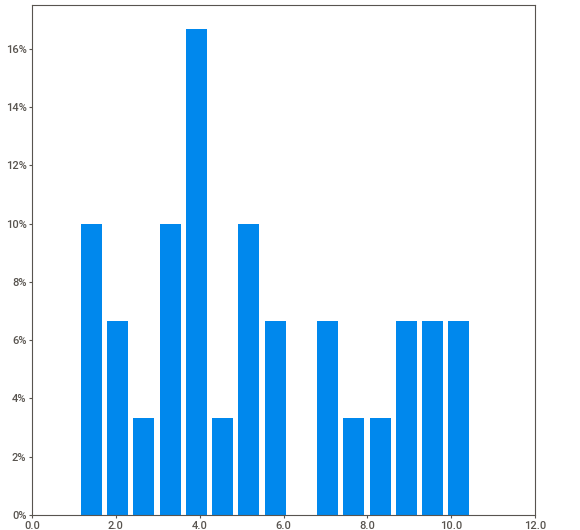
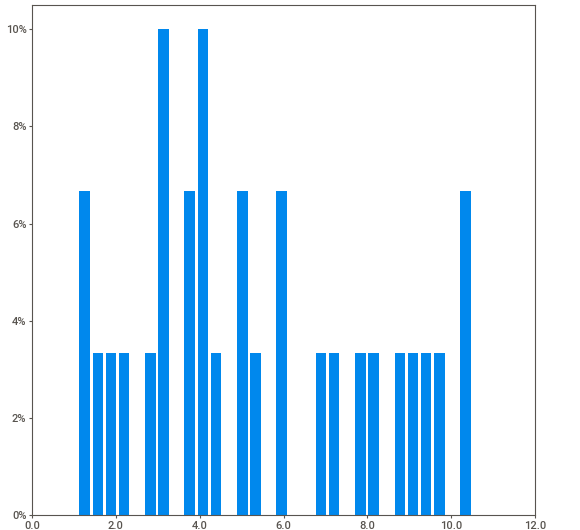
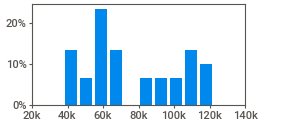
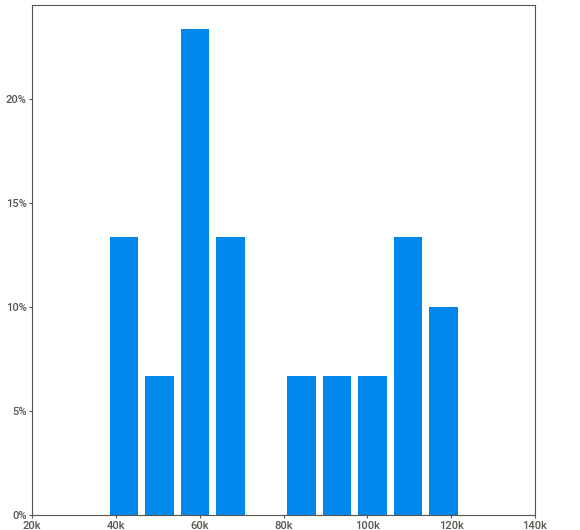
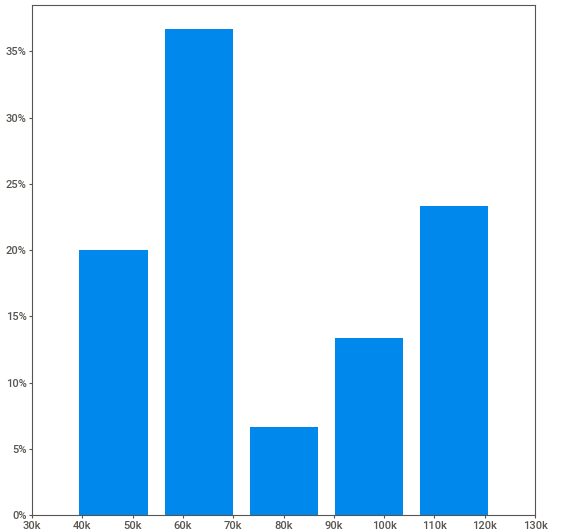
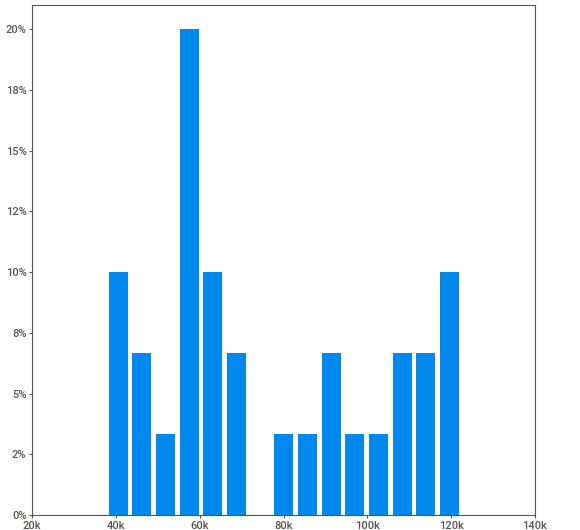
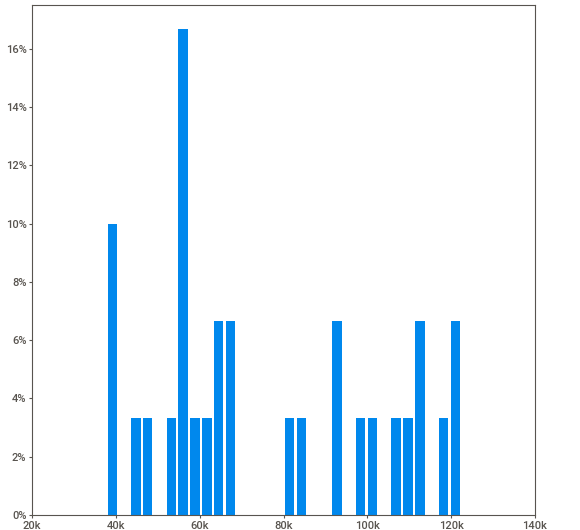
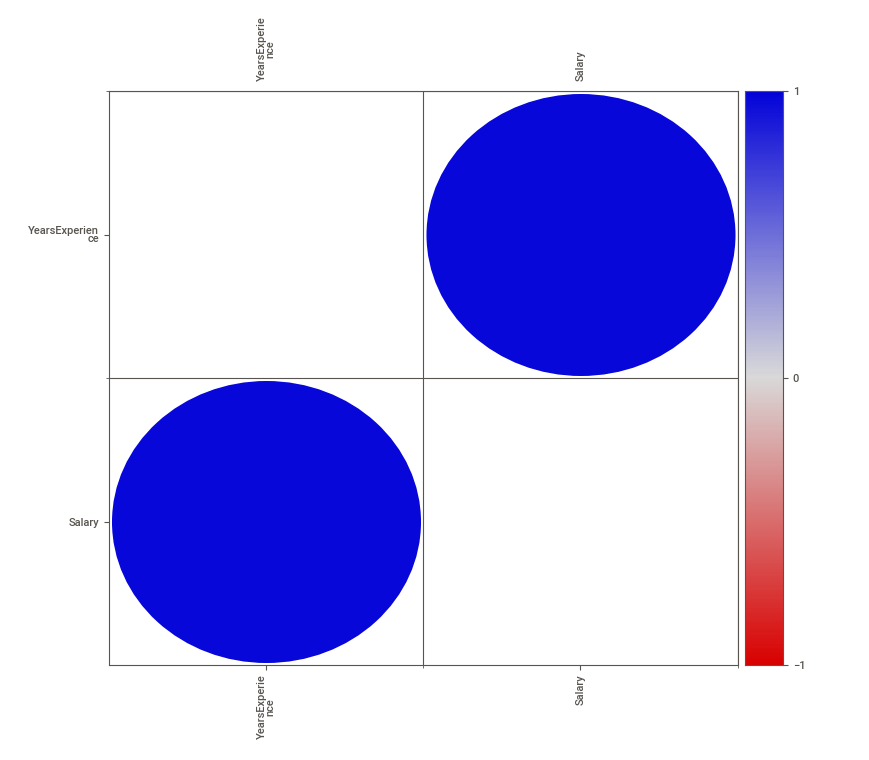
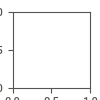

In [8]:
# relatório no proprio jupyter
my_report.show_notebook(w=None, h=None, scale=0.7, layout="vertical", filepath=None)

In [ ]:
# eda na mão
df.describe()

# Check data quality

um modelo de regressão linear do tipo leas-squares é sensível à qualidade dos dados. Cheque por
- missing values
- outliers
- e veja a escala

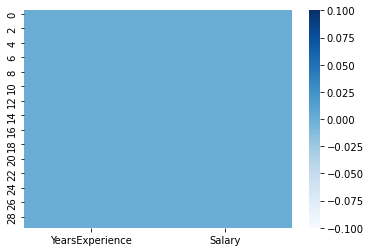

In [3]:
# DETECT MISSING VALUES
# se houver, preencha os valores com a mediana ou a média
# ex: df["Salary"].fillna(df["YearsExperience"].mean())
sns.heatmap(df.isnull(), cmap="Blues")
plt.show()

# Detect NORMALITY (através de HISTOGRAM)

Regressores assumem q os dados seguem uma distribuição normal (ou seja, q os valores estejam espalhados simetricamente em torno de uma valor médio). 

Se os dados não estiverem normais, aplique transformações.

As transformações tem a ver com a skewness
>  data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7

Qd a skew é negativa
    - power transformation
    - exponential transformation
Qd a skew é positiva
    - log transformation
    - square root transformation

A notação matematica q representa uma distribuição normal padrão é
    N(0,1)
   significa que a média é zero e o desvio padrão é 1

/srv/conda/envs/saturn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


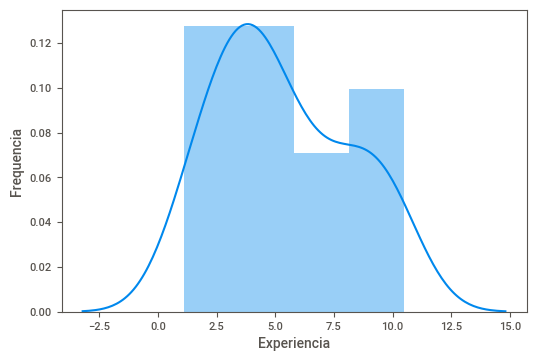

In [11]:
# histogramas podem ser usados para vizualizar se há normalidade ou não

sns.distplot(df["YearsExperience"])
plt.ylabel("Frequencia")
plt.xlabel("Experiencia")
plt.show()

/srv/conda/envs/saturn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


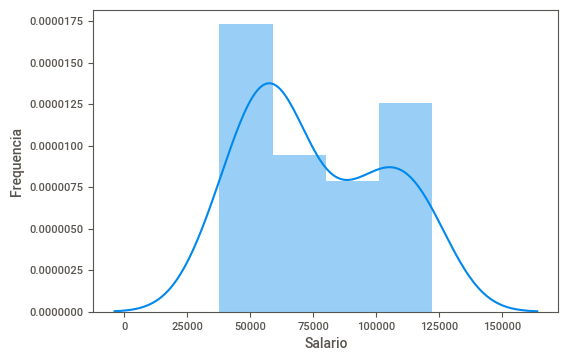

In [13]:
sns.distplot(df["Salary"])
plt.ylabel("Frequencia")
plt.xlabel("Salario")
plt.show()

## Teste de Normalidade Shapiro-Wilk

The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

This function returns a test statistic and a corresponding p-value. If the p-value is below a certain significance level (padrão é .05), then we have sufficient evidence to say that the sample data does not come from a normal distribution.


In [5]:
from scipy.stats import shapiro

shapiro(df["Salary"])

ShapiroResult(statistic=0.9103151559829712, pvalue=0.015155306085944176)

In [6]:
shapiro(df["YearsExperience"])

ShapiroResult(statistic=0.9420625567436218, pvalue=0.10337652266025543)

In [ ]:
Veja que o resultado do pvalue foi bem menor do que .05 (foi 0.01) no caso do Salario, mas não no de Anos de Experiencia, logo, a amostra não veio de uma distribuição normal, isto é, a premissa de normalidade não esta cumprida

# Detect OUTLIER (através de um BOXPLOT)

A não normalidade ocorre, dentre outros fatores, por conta da skew. E a skew tem relação com outliers

Um outlier representa um valor que é ou mt grande ou mt pequeno. 

Ele influencia no modelo inflando a taxa de erro

Podemos ou remover, ou trocar o outlier por um valor médio

# BOXPLOT

Um boxplot sumariza a informação sobre a forma e dispersão do dado

Suas propriedades são:
    - uma caixa representa os valores médios do dado
        - a linha mediana representa o ponto onde 50% dos dados estão
        - e quartis que representam 25% e 75%
    - whiskers: são 

/srv/conda/envs/saturn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


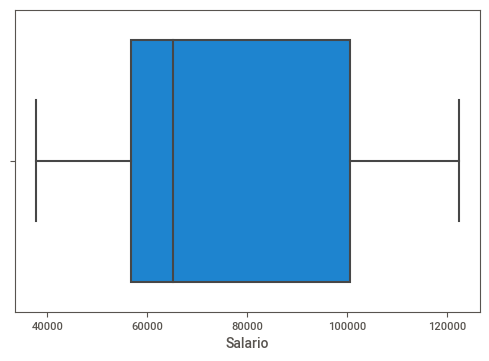

In [17]:
sns.boxplot(df["Salary"])
plt.xlabel("Salario")
plt.show()

In [26]:
from scipy.stats import skew
skew(df['Salary'])


0.3361618825592921

In [30]:
from scipy.stats import skewtest
skewtest(df['Salary'])


SkewtestResult(statistic=0.8675440888527673, pvalue=0.38564396578927684)

In [32]:
from scipy.stats import describe
describe(df['Salary'])

DescribeResult(nobs=30, minmax=(37731.0, 122391.0), mean=76003.0, variance=751550960.4137931, skewness=0.3361618825592921, kurtosis=-1.2829125042427751)

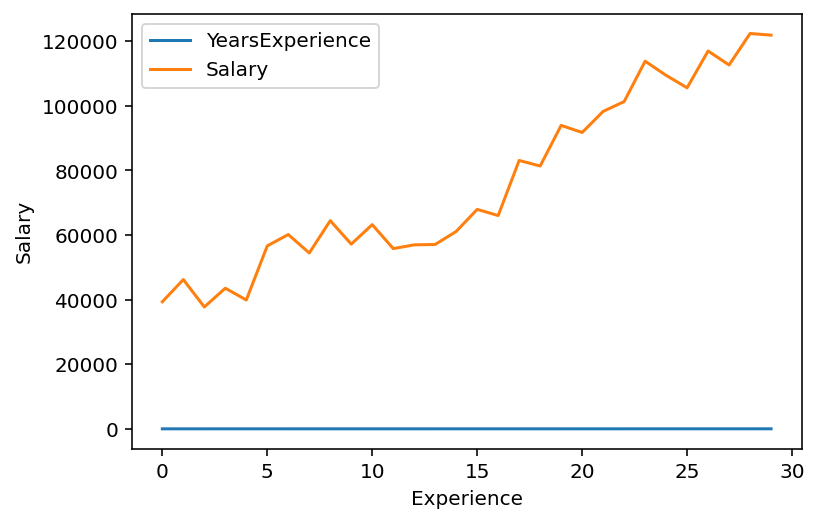

In [33]:
# Employees’ Years of Work Experience and Employees’ Salaries Line Plot
df.plot(kind="line")
# variavel dependente
plt.xlabel("Experience")
#variavel independente
plt.ylabel("Salary")
plt.show()

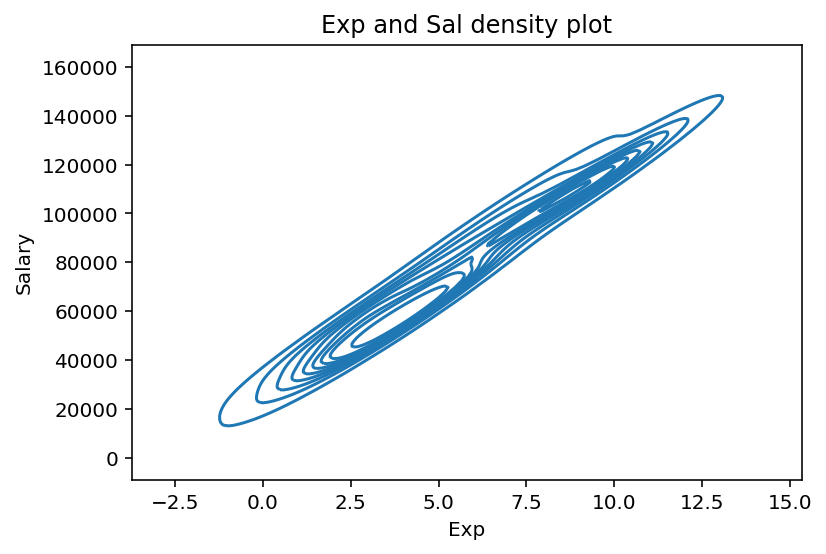

In [36]:
# density plot
sns.kdeplot(df['YearsExperience'], df['Salary'])
plt.title("Exp and Sal density plot")
plt.xlabel("Exp")
plt.ylabel("Salary")
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

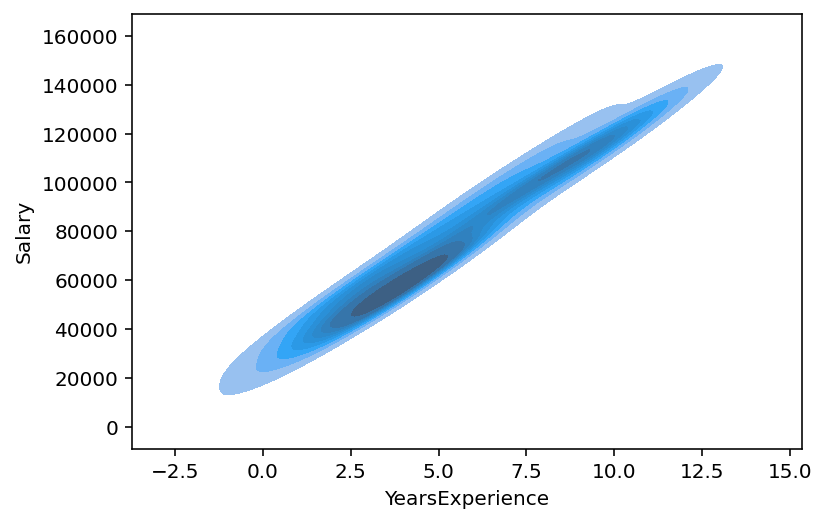

In [41]:
sns.kdeplot(data=df, x="YearsExperience", y="Salary", fill='true')

# PDF using kernel density estimation

O gráfico acima capta as probabilidades de uma variavel continua
Vemos que há clustered data points, o q mostra q a dist não é normal o suficiente

>  If there are more points grouped locally, the estimation is higher as the probability of seeing a point at that location increases. The kernel function is the specific mechanism used to weigh the points across the data set. 

